In [1]:
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
import pandas as pd
import scipy as sp
import matplotlib.pyplot as plt
%matplotlib inline
from matplotlib import style
import seaborn as sns
import numpy as np
import statsmodels.api as sm
from sklearn.datasets import make_regression
from patsy import dmatrix
from sklearn.linear_model import LinearRegression
import statsmodels.stats.api as sms
import numpy as np
import re

/Users/jakekong/.pyenv/versions/3.6.1/lib/python3.6/site-packages/statsmodels/compat/pandas.py:56: FutureWarning: The pandas.core.datetools module is deprecated and will be removed in a future version. Please use the pandas.tseries module instead.
  from pandas.core import datetools


In [2]:
df = pd.read_csv('train.csv')
df

,AnimalID,Name,DateTime,OutcomeType,OutcomeSubtype,AnimalType,SexuponOutcome,AgeuponOutcome,Breed,Color
0,A671945,Hambone,2014-02-12 18:22:00,Return_to_owner,NaN,Dog,Neutered Male,1 year,Shetland Sheepdog Mix,Brown/White
1,A656520,Emily,2013-10-13 12:44:00,Euthanasia,Suffering,Cat,Spayed Female,1 year,Domestic Shorthair Mix,Cream Tabby
2,A686464,Pearce,2015-01-31 12:28:00,Adoption,Foster,Dog,Neutered Male,2 years,Pit Bull Mix,Blue/White
3,A683430,NaN,2014-07-11 19:09:00,Transfer,Partner,Cat,Intact Male,3 weeks,Domestic Shorthair Mix,Blue Cream
4,A667013,NaN,2013-11-15 12:52:00,Transfer,Partner,Dog,Neutered Male,2 years,Lhasa Apso/Miniature Poodle,Tan
5,A677334,Elsa,2014-04-25 13:04:00,Transfer,Partner,Dog,Intact Female,1 month,Cairn Terrier/Chihuahua Shorthair,Black/Tan
6,A699218,Jimmy,2015-03-28 13:11:00,Transfer,Partner,Cat,Intact Male,3 weeks,Domestic Shorthair Mix,Blue Tabby
7,A701489,NaN,2015-04-30 17:02:00,Transfer,Partner,Cat,Unknown,3 weeks,Domestic Shorthair Mix,Brown Tabby
8,A671784,Lucy,2014-02-04 17:17:00,Adoption,NaN,Dog,Spayed Female,5 months,American Pit Bull Terrier Mix,Red/White
9,A677747,NaN,2014-05-03 07:48:00,Adoption,Offsite,Dog,Spayed Female,1 year,Cairn Terrier,White


# outcometype vs animaltype

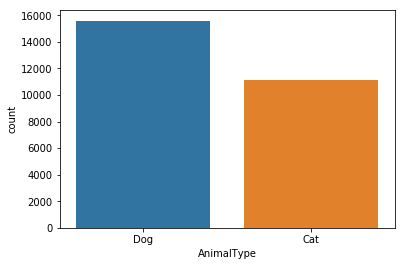

In [3]:
sns.countplot(df.AnimalType)

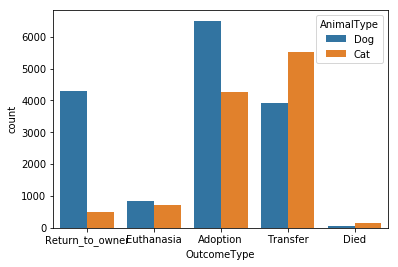

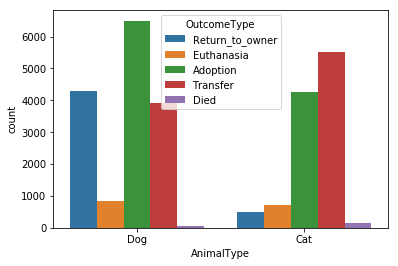

In [4]:
sns.countplot(df.OutcomeType, hue= df.AnimalType)
plt.show()

sns.countplot(df.AnimalType, hue= df.OutcomeType)
plt.show()


# AnimalType 는 충분히 영향력 있는 변수로 볼수 있다.


- dog 의 경우 return_to_owner (또는 adoption) 의 확률이 cat 보다 높다.
- dog 나 cat 이나 안락사 (또는 죽음) 의 확률은 비슷하다. (다른 영향력있는 변수를 사용하자)
- cat 의 경우 dog 보다 transfer 될 확률이 높다.



# outcometype vs sexuponoutcome

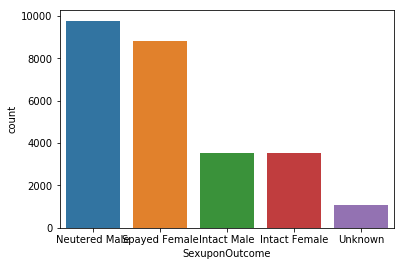

In [5]:
sns.countplot(df.SexuponOutcome)

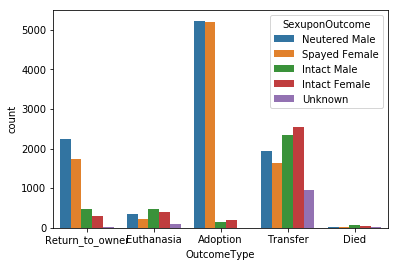

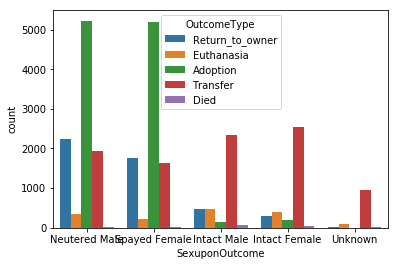

In [6]:
sns.countplot(df.OutcomeType, hue= df.SexuponOutcome)
plt.show()

sns.countplot(df.SexuponOutcome, hue= df.OutcomeType)
plt.show()


- 중성화 된 cat 과 dog의 adoption & return_to_owner 확률이 그렇지 않은 그룹보다 월등히 높다.



# outcometype vs name

In [7]:
variable0 = df["Name"].replace(np.nan, 'Without Name')

def name(x):
    if x.find("Without Name") == 0: return x
    return 'With Name'

variable = variable0.apply(name)

variable

0           With Name
1           With Name
2           With Name
3        Without Name
4        Without Name
5           With Name
6           With Name
7        Without Name
8           With Name
9        Without Name
10       Without Name
11       Without Name
12          With Name
13          With Name
14          With Name
15          With Name
16       Without Name
17       Without Name
18          With Name
19          With Name
20          With Name
21          With Name
22          With Name
23          With Name
24          With Name
25          With Name
26          With Name
27          With Name
28          With Name
29          With Name
             ...     
26699       With Name
26700       With Name
26701       With Name
26702    Without Name
26703       With Name
26704       With Name
26705       With Name
26706       With Name
26707    Without Name
26708       With Name
26709    Without Name
26710       With Name
26711       With Name
26712       With Name
26713    W

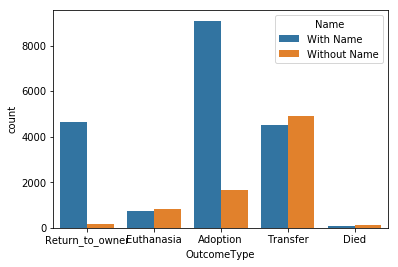

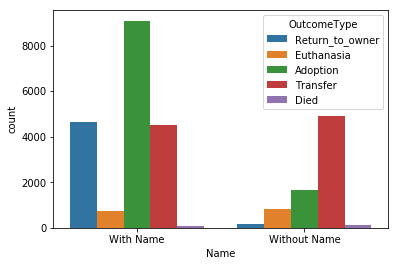

In [8]:
sns.countplot(df.OutcomeType, hue= variable)
plt.show()

sns.countplot(variable, hue= df.OutcomeType)
plt.show()


In [9]:
age = df["AgeuponOutcome"].replace(np.nan, 0)

In [10]:
def age_by_day(x):
    if x ==0: 
        return x
    age = int(x.split(" ")[0])
    if x.find('year') >= 0: return age*365
    if x.find('month') >= 0: return age*12
    if x.find('week') >= 0: return age*7
    if x.find('day') >= 0: return age
    else: return 0
    
def group_age(x):       # 구분 한 숫자는 encoding.ipynb의 age histogram 참조
    if x <= 365: return 'toy'
    elif x <= 730: return 'young'
    elif x <= 1460: return 'mature'
    else: return 'old'

In [11]:
age_by_day1 = age.apply(age_by_day)

In [12]:
group_age1 = age_by_day1.apply(group_age)

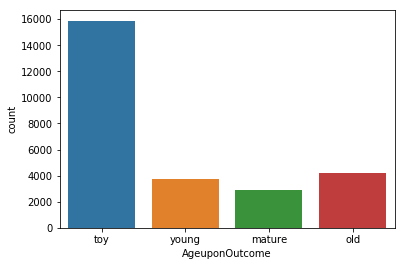

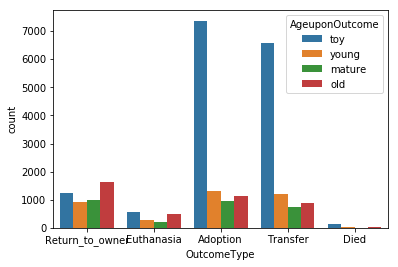

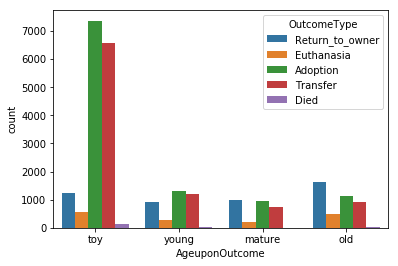

In [13]:
sns.countplot(group_age1)
plt.show()

sns.countplot(df.OutcomeType, hue= group_age1)
plt.show()

sns.countplot(group_age1, hue= df.OutcomeType)
plt.show()
